## Business Understanding

Classify the posture of a person based on accelerometer and gyroscope reading from a phone.

### Specifying the question

Part 1: Dimensionality Reduction

Reduce the  dataset to a low dimensional dataset using the t-SNE algorithm or PCA.

Part 2: Feature Selection

Perform feature selection through the use of the unsupervised learning methods.

Part 3: Anomaly Detection

Check whether there are any anomalies in the given dataset

Part 3: Clustering

Perform clustering using Kmeans or hierachical clustering

### Metric for success

- Dataset with reduced dimensions
- Cluster the data

### Understanding the context

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

### Dataset
Dataset sourced from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

### Recording the experimental design
- Problem Definition
- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution
- Challenge the Solution
- Follow up Questions

## Importation

### Import Libraries

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE as tsne
import numpy as np

In [3]:
#Increase columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
!pwd

/home/ken/Data Science/MoringaDS/Unspervised Learning Group Project


### Import the data

#### Body Acceleration

In [43]:
## Body Acceleration X
df_body_acc_x_train = pd.read_csv('body_acc_x_train.txt',header=None,delim_whitespace=True)
df_body_acc_x_train['signal'] = 1 # body_acc_x_train =1
print("body_acc_x_train: ",df_body_acc_x_train.shape)
df_body_acc_x_train.head()

## Body Acceleration Y
df_body_acc_y_train = pd.read_csv('body_acc_y_train.txt',header=None,delim_whitespace=True)
df_body_acc_y_train['signal'] = 2 #body_acc_y_train =2
print("body_acc_y_train: ",df_body_acc_y_train.shape)
df_body_acc_y_train.head()

## Body Acceleration z
df_body_acc_z_train = pd.read_csv('body_acc_z_train.txt',header=None,delim_whitespace=True)
df_body_acc_z_train['signal'] = 3 #body_acc_z_train =3
print("body_acc_z_train: ",df_body_acc_z_train.shape)
df_body_acc_z_train.head()

## Body Gyro x train
df_body_gyro_x_train = pd.read_csv('body_gyro_x_train.txt',header=None,delim_whitespace=True)
df_body_gyro_x_train['signal'] = 4 #body_gyro_x_train =4
print("body_gyro_x_train: ",df_body_gyro_x_train.shape)
df_body_gyro_x_train.head()

## Body Gyro y train
df_body_gyro_y_train = pd.read_csv('body_gyro_y_train.txt',header=None,delim_whitespace=True)
df_body_gyro_y_train['signal'] = 5 #body_gyro_y_train =4
print("body_gyro_y_train: ",df_body_gyro_y_train.shape)
df_body_gyro_y_train.head()

## Body Gyro z train
df_body_gyro_z_train = pd.read_csv('body_gyro_z_train.txt',header=None,delim_whitespace=True)
df_body_gyro_z_train['signal'] = 6 #body_gyro_z_train =4
print("body_gyro_z_train: ",df_body_gyro_z_train.shape)
df_body_gyro_z_train.head()

## Total acc x train
df_total_acc_x_train = pd.read_csv('total_acc_x_train.txt',header=None,delim_whitespace=True)
df_total_acc_x_train['signal'] = 7 #total_acc_x_train =4
print("total_acc_x_train: ",df_total_acc_x_train.shape)
df_total_acc_x_train.head()

## Total acc y train
df_total_acc_y_train = pd.read_csv('total_acc_y_train.txt',header=None,delim_whitespace=True)
df_total_acc_y_train['signal'] = 8 #total_acc_y_train =4
print("total_acc_y_train: ",df_total_acc_y_train.shape)
df_total_acc_y_train.head()

## Total acc z train
df_total_acc_z_train = pd.read_csv('total_acc_z_train.txt',header=None,delim_whitespace=True)
df_total_acc_z_train['signal'] = 9 #total_acc_z_train =4
print("total_acc_z_train: ",df_total_acc_z_train.shape)
#total_acc_z_train.head()

body_acc_x_train:  (7352, 129)
body_acc_y_train:  (7352, 129)
body_acc_z_train:  (7352, 129)
body_gyro_x_train:  (7352, 129)
body_gyro_y_train:  (7352, 129)
body_gyro_z_train:  (7352, 129)
total_acc_x_train:  (7352, 129)
total_acc_y_train:  (7352, 129)
total_acc_z_train:  (7352, 129)


### Merge dataframes

In [51]:
frames = [df_body_acc_x_train,df_body_acc_y_train,df_body_acc_z_train,df_body_gyro_x_train,
         df_body_gyro_y_train,df_body_gyro_z_train,df_total_acc_x_train,df_total_acc_y_train,
         df_total_acc_z_train]
df_merged = pd.concat(frames)
df_merged.shape

(66168, 129)

#### Training Data

In [58]:
## Total acc z train
df = pd.read_csv('X_train.txt',header=None,delim_whitespace=True)
print("Data: ",df.shape)
df.head()

Data:  (7767, 561)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,-0.744893,-0.648447,0.841796,0.708440,0.651716,-0.975752,-0.999950,-0.999888,-0.998014,-0.993999,-0.991980,-0.970970,-0.547095,-0.700974,-0.622697,0.921884,-0.719483,0.342168,-0.161318,0.266049,-0.274351,0.267205,-0.020958,0.382610,-0.501748,0.512463,-0.206337,0.376778,0.435172,0.660199,0.960051,-0.135939,0.115556,-0.988134,-0.982693,-0.919723,-0.988362,-0.985523,-0.931834,0.892055,-0.161350,0.124660,0.977436,-0.121513,0.056114,-0.374464,0.891821,-0.970836,-0.975511,-0.989141,-0.990444,-0.948887,-1.0,-1.0,0.034249,-0.593146,0.594636,-0.596440,0.598560,-0.712209,0.709630,-0.707484,0.705000,-0.992117,0.992647,-0.992885,0.991748,0.570269,0.439065,0.986913,0.077996,0.005001,-0.097790,-0.993519,-0.988360,-0.993575,-0.994437,-0.986207,-0.992818,-0.985180,-0.991994,-0.993119,0.989835,0.991957,0.990519,-0.993658,-0.999935,-0.999820,-0.999878,-0.994407,-0.986025,-0.988698,-0.819949,-0.793046,-0.863145,0.948026,-0.334807,0.714202,0.498686,0.296681,-0.189513,0.310912,0.237110,0.410937,-0.509475,0.475574,-0.352207,-0.394631,-0.016790,-0.158237,-0.006101,0.007515,-0.063862,-0.985312,-0.976608,-0.993319,-0.984589,-0.976326,-0.993341,-0.897563,-0.936676,-0.762644,0.854297,0.895032,0.830841,-0.967122,-0.999578,-0.999354,-0.999818,-0.984400,-0.978577,-0.993053,0.082632,0.174515,-0.218437,0.320926,-0.452604,0.466133,-0.203632,1.000000,-1.000000,0.352276,0.448398,0.757793,-0.782465,0.703725,-0.399107,0.712274,0.135604,0.302777,-0.099167,-0.055517,-0.061986,-0.991918,-0.992519,-0.992352,-0.991961,-0.994949,-0.992835,-0.991766,-0.986565,-0.991894,0.994225,0.991761,0.989352,-0.994523,-0.999937,-0.999954,-0.999925,-0.992214,-0.996938,-0.992584,-0.589851,-0.709836,-0.572107,0.374661,-0.306094,0.335506,-0.079307,0.989560,-0.454970,0.384435,0.307638,0.936232,-0.666282,0.772202,0.529585,-0.147221,-0.094462,0.351206,-0.969546,-0.961540,-0.967646,-0.947236,-0.994174,-0.969546,-0.999150,-0.970525,-0.219620,-0.124072,-0.058241,0.174306,0.201620,-0.969546,-0.961540,-0.967646,-0.947236,-0.994174,-0.969

#### Create column headers

In [60]:
df.columns=['tBodyAcc-Mean-1','tBodyAcc-Mean-2','tBodyAcc-Mean-3','tBodyAcc-STD-1','tBodyAcc-STD-2','tBodyAcc-STD-3','tBodyAcc-Mad-1','tBodyAcc-Mad-2','tBodyAcc-Mad-3','tBodyAcc-Max-1','tBodyAcc-Max-2','tBodyAcc-Max-3','tBodyAcc-Min-1','tBodyAcc-Min-2','tBodyAcc-Min-3','tBodyAcc-SMA-1','tBodyAcc-Energy-1','tBodyAcc-Energy-2','tBodyAcc-Energy-3','tBodyAcc-IQR-1','tBodyAcc-IQR-2','tBodyAcc-IQR-3','tBodyAcc-ropy-1','tBodyAcc-ropy-1','tBodyAcc-ropy-1','tBodyAcc-ARCoeff-1','tBodyAcc-ARCoeff-2','tBodyAcc-ARCoeff-3','tBodyAcc-ARCoeff-4','tBodyAcc-ARCoeff-5','tBodyAcc-ARCoeff-6','tBodyAcc-ARCoeff-7','tBodyAcc-ARCoeff-8','tBodyAcc-ARCoeff-9','tBodyAcc-ARCoeff-10','tBodyAcc-ARCoeff-11','tBodyAcc-ARCoeff-12','tBodyAcc-Correlation-1','tBodyAcc-Correlation-2','tBodyAcc-Correlation-3','tGravityAcc-Mean-1','tGravityAcc-Mean-2','tGravityAcc-Mean-3','tGravityAcc-STD-1','tGravityAcc-STD-2','tGravityAcc-STD-3','tGravityAcc-Mad-1','tGravityAcc-Mad-2','tGravityAcc-Mad-3','tGravityAcc-Max-1','tGravityAcc-Max-2','tGravityAcc-Max-3','tGravityAcc-Min-1','tGravityAcc-Min-2','tGravityAcc-Min-3','tGravityAcc-SMA-1','tGravityAcc-Energy-1','tGravityAcc-Energy-2','tGravityAcc-Energy-3','tGravityAcc-IQR-1','tGravityAcc-IQR-2','tGravityAcc-IQR-3','tGravityAcc-ropy-1','tGravityAcc-ropy-1','tGravityAcc-ropy-1','tGravityAcc-ARCoeff-1','tGravityAcc-ARCoeff-2','tGravityAcc-ARCoeff-3','tGravityAcc-ARCoeff-4','tGravityAcc-ARCoeff-5','tGravityAcc-ARCoeff-6','tGravityAcc-ARCoeff-7','tGravityAcc-ARCoeff-8','tGravityAcc-ARCoeff-9','tGravityAcc-ARCoeff-10','tGravityAcc-ARCoeff-11','tGravityAcc-ARCoeff-12','tGravityAcc-Correlation-1','tGravityAcc-Correlation-2','tGravityAcc-Correlation-3','tBodyAccJerk-Mean-1','tBodyAccJerk-Mean-2','tBodyAccJerk-Mean-3','tBodyAccJerk-STD-1','tBodyAccJerk-STD-2','tBodyAccJerk-STD-3','tBodyAccJerk-Mad-1','tBodyAccJerk-Mad-2','tBodyAccJerk-Mad-3','tBodyAccJerk-Max-1','tBodyAccJerk-Max-2','tBodyAccJerk-Max-3','tBodyAccJerk-Min-1','tBodyAccJerk-Min-2','tBodyAccJerk-Min-3','tBodyAccJerk-SMA-1','tBodyAccJerk-Energy-1','tBodyAccJerk-Energy-2','tBodyAccJerk-Energy-3','tBodyAccJerk-IQR-1','tBodyAccJerk-IQR-2','tBodyAccJerk-IQR-3','tBodyAccJerk-ropy-1','tBodyAccJerk-ropy-1','tBodyAccJerk-ropy-1','tBodyAccJerk-ARCoeff-1','tBodyAccJerk-ARCoeff-2','tBodyAccJerk-ARCoeff-3','tBodyAccJerk-ARCoeff-4','tBodyAccJerk-ARCoeff-5','tBodyAccJerk-ARCoeff-6','tBodyAccJerk-ARCoeff-7','tBodyAccJerk-ARCoeff-8','tBodyAccJerk-ARCoeff-9','tBodyAccJerk-ARCoeff-10','tBodyAccJerk-ARCoeff-11','tBodyAccJerk-ARCoeff-12','tBodyAccJerk-Correlation-1','tBodyAccJerk-Correlation-2','tBodyAccJerk-Correlation-3','tBodyGyro-Mean-1','tBodyGyro-Mean-2','tBodyGyro-Mean-3','tBodyGyro-STD-1','tBodyGyro-STD-2','tBodyGyro-STD-3','tBodyGyro-Mad-1','tBodyGyro-Mad-2','tBodyGyro-Mad-3','tBodyGyro-Max-1','tBodyGyro-Max-2','tBodyGyro-Max-3','tBodyGyro-Min-1','tBodyGyro-Min-2','tBodyGyro-Min-3','tBodyGyro-SMA-1','tBodyGyro-Energy-1','tBodyGyro-Energy-2','tBodyGyro-Energy-3','tBodyGyro-IQR-1','tBodyGyro-IQR-2','tBodyGyro-IQR-3','tBodyGyro-ropy-1','tBodyGyro-ropy-1','tBodyGyro-ropy-1','tBodyGyro-ARCoeff-1','tBodyGyro-ARCoeff-2','tBodyGyro-ARCoeff-3','tBodyGyro-ARCoeff-4','tBodyGyro-ARCoeff-5','tBodyGyro-ARCoeff-6','tBodyGyro-ARCoeff-7','tBodyGyro-ARCoeff-8','tBodyGyro-ARCoeff-9','tBodyGyro-ARCoeff-10','tBodyGyro-ARCoeff-11','tBodyGyro-ARCoeff-12','tBodyGyro-Correlation-1','tBodyGyro-Correlation-2','tBodyGyro-Correlation-3','tBodyGyroJerk-Mean-1','tBodyGyroJerk-Mean-2','tBodyGyroJerk-Mean-3','tBodyGyroJerk-STD-1','tBodyGyroJerk-STD-2','tBodyGyroJerk-STD-3','tBodyGyroJerk-Mad-1','tBodyGyroJerk-Mad-2','tBodyGyroJerk-Mad-3','tBodyGyroJerk-Max-1','tBodyGyroJerk-Max-2','tBodyGyroJerk-Max-3','tBodyGyroJerk-Min-1','tBodyGyroJerk-Min-2','tBodyGyroJerk-Min-3','tBodyGyroJerk-SMA-1','tBodyGyroJerk-Energy-1','tBodyGyroJerk-Energy-2','tBodyGyroJerk-Energy-3','tBodyGyroJerk-IQR-1','tBodyGyroJerk-IQR-2','tBodyGyroJerk-IQR-3','tBodyGyroJerk-ropy-1','tBodyGyroJerk-ropy-1','tBodyGyroJerk-ropy-1','tBodyGyroJerk-ARCoeff-1','tBodyGyroJerk-ARCoeff-2','tBodyGyroJerk-ARCoeff-3','tBodyGyroJerk-ARCoeff-4','tBodyGyroJerk-ARCoeff-5','tBodyGyroJerk-ARCoeff-6','tBodyGyroJerk-ARCoeff-7','tBodyGyroJerk-ARCoeff-8','tBodyGyroJerk-ARCoeff-9','tBodyGyroJerk-ARCoeff-10','tBodyGyroJerk-ARCoeff-11','tBodyGyroJerk-ARCoeff-12','tBodyGyroJerk-Correlation-1','tBodyGyroJerk-Correlation-2','tBodyGyroJerk-Correlation-3','tBodyAccMag-Mean-1','tBodyAccMag-STD-1','tBodyAccMag-Mad-1','tBodyAccMag-Max-1','tBodyAccMag-Min-1','tBodyAccMag-SMA-1','tBodyAccMag-Energy-1','tBodyAccMag-IQR-1','tBodyAccMag-ropy-1','tBodyAccMag-ARCoeff-1','tBodyAccMag-ARCoeff-2','tBodyAccMag-ARCoeff-3','tBodyAccMag-ARCoeff-4','tGravityAccMag-Mean-1','tGravityAccMag-STD-1','tGravityAccMag-Mad-1','tGravityAccMag-Max-1','tGravityAccMag-Min-1','tGravityAccMag-SMA-1','tGravityAccMag-Energy-1','tGravityAccMag-IQR-1','tGravityAccMag-ropy-1','tGravityAccMag-ARCoeff-1','tGravityAccMag-ARCoeff-2','tGravityAccMag-ARCoeff-3','tGravityAccMag-ARCoeff-4','tBodyAccJerkMag-Mean-1','tBodyAccJerkMag-STD-1','tBodyAccJerkMag-Mad-1','tBodyAccJerkMag-Max-1','tBodyAccJerkMag-Min-1','tBodyAccJerkMag-SMA-1','tBodyAccJerkMag-Energy-1','tBodyAccJerkMag-IQR-1','tBodyAccJerkMag-ropy-1','tBodyAccJerkMag-ARCoeff-1','tBodyAccJerkMag-ARCoeff-2','tBodyAccJerkMag-ARCoeff-3','tBodyAccJerkMag-ARCoeff-4','tBodyGyroMag-Mean-1','tBodyGyroMag-STD-1','tBodyGyroMag-Mad-1','tBodyGyroMag-Max-1','tBodyGyroMag-Min-1','tBodyGyroMag-SMA-1','tBodyGyroMag-Energy-1','tBodyGyroMag-IQR-1','tBodyGyroMag-ropy-1','tBodyGyroMag-ARCoeff-1','tBodyGyroMag-ARCoeff-2','tBodyGyroMag-ARCoeff-3','tBodyGyroMag-ARCoeff-4','tBodyGyroJerkMag-Mean-1','tBodyGyroJerkMag-STD-1','tBodyGyroJerkMag-Mad-1','tBodyGyroJerkMag-Max-1','tBodyGyroJerkMag-Min-1','tBodyGyroJerkMag-SMA-1','tBodyGyroJerkMag-Energy-1','tBodyGyroJerkMag-IQR-1','tBodyGyroJerkMag-ropy-1','tBodyGyroJerkMag-ARCoeff-1','tBodyGyroJerkMag-ARCoeff-2','tBodyGyroJerkMag-ARCoeff-3','tBodyGyroJerkMag-ARCoeff-4','fBodyAcc-Mean-1','fBodyAcc-Mean-2','fBodyAcc-Mean-3','fBodyAcc-STD-1','fBodyAcc-STD-2','fBodyAcc-STD-3','fBodyAcc-Mad-1','fBodyAcc-Mad-2','fBodyAcc-Mad-3','fBodyAcc-Max-1','fBodyAcc-Max-2','fBodyAcc-Max-3','fBodyAcc-Min-1','fBodyAcc-Min-2','fBodyAcc-Min-3','fBodyAcc-SMA-1','fBodyAcc-Energy-1','fBodyAcc-Energy-2','fBodyAcc-Energy-3','fBodyAcc-IQR-1','fBodyAcc-IQR-2','fBodyAcc-IQR-3','fBodyAcc-ropy-1','fBodyAcc-ropy-1','fBodyAcc-ropy-1','fBodyAcc-MaxInds-1','fBodyAcc-MaxInds-2','fBodyAcc-MaxInds-3','fBodyAcc-MeanFreq-1','fBodyAcc-MeanFreq-2','fBodyAcc-MeanFreq-3','fBodyAcc-Skewness-1','fBodyAcc-Kurtosis-1','fBodyAcc-Skewness-1','fBodyAcc-Kurtosis-1','fBodyAcc-Skewness-1','fBodyAcc-Kurtosis-1','fBodyAcc-BandsEnergyOld-1','fBodyAcc-BandsEnergyOld-2','fBodyAcc-BandsEnergyOld-3','fBodyAcc-BandsEnergyOld-4','fBodyAcc-BandsEnergyOld-5','fBodyAcc-BandsEnergyOld-6','fBodyAcc-BandsEnergyOld-7','fBodyAcc-BandsEnergyOld-8','fBodyAcc-BandsEnergyOld-9','fBodyAcc-BandsEnergyOld-10','fBodyAcc-BandsEnergyOld-11','fBodyAcc-BandsEnergyOld-12','fBodyAcc-BandsEnergyOld-13','fBodyAcc-BandsEnergyOld-14','fBodyAcc-BandsEnergyOld-15','fBodyAcc-BandsEnergyOld-16','fBodyAcc-BandsEnergyOld-17','fBodyAcc-BandsEnergyOld-18','fBodyAcc-BandsEnergyOld-19','fBodyAcc-BandsEnergyOld-20','fBodyAcc-BandsEnergyOld-21','fBodyAcc-BandsEnergyOld-22','fBodyAcc-BandsEnergyOld-23','fBodyAcc-BandsEnergyOld-24','fBodyAcc-BandsEnergyOld-25','fBodyAcc-BandsEnergyOld-26','fBodyAcc-BandsEnergyOld-27','fBodyAcc-BandsEnergyOld-28','fBodyAcc-BandsEnergyOld-29','fBodyAcc-BandsEnergyOld-30','fBodyAcc-BandsEnergyOld-31','fBodyAcc-BandsEnergyOld-32','fBodyAcc-BandsEnergyOld-33','fBodyAcc-BandsEnergyOld-34','fBodyAcc-BandsEnergyOld-35','fBodyAcc-BandsEnergyOld-36','fBodyAcc-BandsEnergyOld-37','fBodyAcc-BandsEnergyOld-38','fBodyAcc-BandsEnergyOld-39','fBodyAcc-BandsEnergyOld-40','fBodyAcc-BandsEnergyOld-41','fBodyAcc-BandsEnergyOld-42','fBodyAccJerk-Mean-1','fBodyAccJerk-Mean-2','fBodyAccJerk-Mean-3','fBodyAccJerk-STD-1','fBodyAccJerk-STD-2','fBodyAccJerk-STD-3','fBodyAccJerk-Mad-1','fBodyAccJerk-Mad-2','fBodyAccJerk-Mad-3','fBodyAccJerk-Max-1','fBodyAccJerk-Max-2','fBodyAccJerk-Max-3','fBodyAccJerk-Min-1','fBodyAccJerk-Min-2','fBodyAccJerk-Min-3','fBodyAccJerk-SMA-1','fBodyAccJerk-Energy-1','fBodyAccJerk-Energy-2','fBodyAccJerk-Energy-3','fBodyAccJerk-IQR-1','fBodyAccJerk-IQR-2','fBodyAccJerk-IQR-3','fBodyAccJerk-ropy-1','fBodyAccJerk-ropy-1','fBodyAccJerk-ropy-1','fBodyAccJerk-MaxInds-1','fBodyAccJerk-MaxInds-2','fBodyAccJerk-MaxInds-3','fBodyAccJerk-MeanFreq-1','fBodyAccJerk-MeanFreq-2','fBodyAccJerk-MeanFreq-3','fBodyAccJerk-Skewness-1','fBodyAccJerk-Kurtosis-1','fBodyAccJerk-Skewness-1','fBodyAccJerk-Kurtosis-1','fBodyAccJerk-Skewness-1','fBodyAccJerk-Kurtosis-1','fBodyAccJerk-BandsEnergyOld-1','fBodyAccJerk-BandsEnergyOld-2','fBodyAccJerk-BandsEnergyOld-3','fBodyAccJerk-BandsEnergyOld-4','fBodyAccJerk-BandsEnergyOld-5','fBodyAccJerk-BandsEnergyOld-6','fBodyAccJerk-BandsEnergyOld-7','fBodyAccJerk-BandsEnergyOld-8','fBodyAccJerk-BandsEnergyOld-9','fBodyAccJerk-BandsEnergyOld-10','fBodyAccJerk-BandsEnergyOld-11','fBodyAccJerk-BandsEnergyOld-12','fBodyAccJerk-BandsEnergyOld-13','fBodyAccJerk-BandsEnergyOld-14','fBodyAccJerk-BandsEnergyOld-15','fBodyAccJerk-BandsEnergyOld-16','fBodyAccJerk-BandsEnergyOld-17','fBodyAccJerk-BandsEnergyOld-18','fBodyAccJerk-BandsEnergyOld-19','fBodyAccJerk-BandsEnergyOld-20','fBodyAccJerk-BandsEnergyOld-21','fBodyAccJerk-BandsEnergyOld-22','fBodyAccJerk-BandsEnergyOld-23','fBodyAccJerk-BandsEnergyOld-24','fBodyAccJerk-BandsEnergyOld-25','fBodyAccJerk-BandsEnergyOld-26','fBodyAccJerk-BandsEnergyOld-27','fBodyAccJerk-BandsEnergyOld-28','fBodyAccJerk-BandsEnergyOld-29','fBodyAccJerk-BandsEnergyOld-30','fBodyAccJerk-BandsEnergyOld-31','fBodyAccJerk-BandsEnergyOld-32','fBodyAccJerk-BandsEnergyOld-33','fBodyAccJerk-BandsEnergyOld-34','fBodyAccJerk-BandsEnergyOld-35','fBodyAccJerk-BandsEnergyOld-36','fBodyAccJerk-BandsEnergyOld-37','fBodyAccJerk-BandsEnergyOld-38','fBodyAccJerk-BandsEnergyOld-39','fBodyAccJerk-BandsEnergyOld-40','fBodyAccJerk-BandsEnergyOld-41','fBodyAccJerk-BandsEnergyOld-42','fBodyGyro-Mean-1','fBodyGyro-Mean-2','fBodyGyro-Mean-3','fBodyGyro-STD-1','fBodyGyro-STD-2','fBodyGyro-STD-3','fBodyGyro-Mad-1','fBodyGyro-Mad-2','fBodyGyro-Mad-3','fBodyGyro-Max-1','fBodyGyro-Max-2','fBodyGyro-Max-3','fBodyGyro-Min-1','fBodyGyro-Min-2','fBodyGyro-Min-3','fBodyGyro-SMA-1','fBodyGyro-Energy-1','fBodyGyro-Energy-2','fBodyGyro-Energy-3','fBodyGyro-IQR-1','fBodyGyro-IQR-2','fBodyGyro-IQR-3','fBodyGyro-ropy-1','fBodyGyro-ropy-1','fBodyGyro-ropy-1','fBodyGyro-MaxInds-1','fBodyGyro-MaxInds-2','fBodyGyro-MaxInds-3','fBodyGyro-MeanFreq-1','fBodyGyro-MeanFreq-2','fBodyGyro-MeanFreq-3','fBodyGyro-Skewness-1','fBodyGyro-Kurtosis-1','fBodyGyro-Skewness-1','fBodyGyro-Kurtosis-1','fBodyGyro-Skewness-1','fBodyGyro-Kurtosis-1','fBodyGyro-BandsEnergyOld-1','fBodyGyro-BandsEnergyOld-2','fBodyGyro-BandsEnergyOld-3','fBodyGyro-BandsEnergyOld-4','fBodyGyro-BandsEnergyOld-5','fBodyGyro-BandsEnergyOld-6','fBodyGyro-BandsEnergyOld-7','fBodyGyro-BandsEnergyOld-8','fBodyGyro-BandsEnergyOld-9','fBodyGyro-BandsEnergyOld-10','fBodyGyro-BandsEnergyOld-11','fBodyGyro-BandsEnergyOld-12','fBodyGyro-BandsEnergyOld-13','fBodyGyro-BandsEnergyOld-14','fBodyGyro-BandsEnergyOld-15','fBodyGyro-BandsEnergyOld-16','fBodyGyro-BandsEnergyOld-17','fBodyGyro-BandsEnergyOld-18','fBodyGyro-BandsEnergyOld-19','fBodyGyro-BandsEnergyOld-20','fBodyGyro-BandsEnergyOld-21','fBodyGyro-BandsEnergyOld-22','fBodyGyro-BandsEnergyOld-23','fBodyGyro-BandsEnergyOld-24','fBodyGyro-BandsEnergyOld-25','fBodyGyro-BandsEnergyOld-26','fBodyGyro-BandsEnergyOld-27','fBodyGyro-BandsEnergyOld-28','fBodyGyro-BandsEnergyOld-29','fBodyGyro-BandsEnergyOld-30','fBodyGyro-BandsEnergyOld-31','fBodyGyro-BandsEnergyOld-32','fBodyGyro-BandsEnergyOld-33','fBodyGyro-BandsEnergyOld-34','fBodyGyro-BandsEnergyOld-35','fBodyGyro-BandsEnergyOld-36','fBodyGyro-BandsEnergyOld-37','fBodyGyro-BandsEnergyOld-38','fBodyGyro-BandsEnergyOld-39','fBodyGyro-BandsEnergyOld-40','fBodyGyro-BandsEnergyOld-41','fBodyGyro-BandsEnergyOld-42','fBodyAccMag-Mean-1','fBodyAccMag-STD-1','fBodyAccMag-Mad-1','fBodyAccMag-Max-1','fBodyAccMag-Min-1','fBodyAccMag-SMA-1','fBodyAccMag-Energy-1','fBodyAccMag-IQR-1','fBodyAccMag-ropy-1','fBodyAccMag-MaxInds-1','fBodyAccMag-MeanFreq-1','fBodyAccMag-Skewness-1','fBodyAccMag-Kurtosis-1','fBodyAccJerkMag-Mean-1','fBodyAccJerkMag-STD-1','fBodyAccJerkMag-Mad-1','fBodyAccJerkMag-Max-1','fBodyAccJerkMag-Min-1','fBodyAccJerkMag-SMA-1','fBodyAccJerkMag-Energy-1','fBodyAccJerkMag-IQR-1','fBodyAccJerkMag-ropy-1','fBodyAccJerkMag-MaxInds-1','fBodyAccJerkMag-MeanFreq-1','fBodyAccJerkMag-Skewness-1','fBodyAccJerkMag-Kurtosis-1','fBodyGyroMag-Mean-1','fBodyGyroMag-STD-1','fBodyGyroMag-Mad-1','fBodyGyroMag-Max-1','fBodyGyroMag-Min-1','fBodyGyroMag-SMA-1','fBodyGyroMag-Energy-1','fBodyGyroMag-IQR-1','fBodyGyroMag-ropy-1','fBodyGyroMag-MaxInds-1','fBodyGyroMag-MeanFreq-1','fBodyGyroMag-Skewness-1','fBodyGyroMag-Kurtosis-1','fBodyGyroJerkMag-Mean-1','fBodyGyroJerkMag-STD-1','fBodyGyroJerkMag-Mad-1','fBodyGyroJerkMag-Max-1','fBodyGyroJerkMag-Min-1','fBodyGyroJerkMag-SMA-1','fBodyGyroJerkMag-Energy-1','fBodyGyroJerkMag-IQR-1','fBodyGyroJerkMag-ropy-1','fBodyGyroJerkMag-MaxInds-1','fBodyGyroJerkMag-MeanFreq-1','fBodyGyroJerkMag-Skewness-1','fBodyGyroJerkMag-Kurtosis-1','tBodyAcc-AngleWRTGravity-1','tBodyAccJerk-AngleWRTGravity-1','tBodyGyro-AngleWRTGravity-1','tBodyGyroJerk-AngleWRTGravity-1','tXAxisAcc-AngleWRTGravity-1','tYAxisAcc-AngleWRTGravity-1','tZAxisAcc-AngleWRTGravity-1']

In [61]:
df.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,tGravityAcc-Mean-1,tGravityAcc-Mean-2,tGravityAcc-Mean-3,tGravityAcc-STD-1,tGravityAcc-STD-2,tGravityAcc-STD-3,tGravityAcc-Mad-1,tGravityAcc-Mad-2,tGravityAcc-Mad-3,tGravityAcc-Max-1,tGravityAcc-Max-2,tGravityAcc-Max-3,tGravityAcc-Min-1,tGravityAcc-Min-2,tGravityAcc-Min-3,tGravityAcc-SMA-1,tGravityAcc-Energy-1,tGravityAcc-Energy-2,tGravityAcc-Energy-3,tGravityAcc-IQR-1,tGravityAcc-IQR-2,tGravityAcc-IQR-3,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ropy-1,tGravityAcc-ARCoeff-1,tGravityAcc-ARCoeff-2,tGravityAcc-ARCoeff-3,tGravityAcc-ARCoeff-4,tGravityAcc-ARCoeff-5,tGravityAcc-ARCoeff-6,tGravityAcc-ARCoeff-7,tGravityAcc-ARCoeff-8,tGravityAcc-ARCoeff-9,tGravityAcc-ARCoeff-10,tGravityAcc-ARCoeff-11,tGravityAcc-ARCoeff-12,tGravityAcc-Correlation-1,tGravityAcc-Correlation-2,tGravityAcc-Correlation-3,tBodyAccJerk-Mean-1,tBodyAccJerk-Mean-2,tBodyAccJerk-Mean-3,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,tBodyAccJerk-STD-3,tBodyAccJerk-Mad-1,tBodyAccJerk-Mad-2,tBodyAccJerk-Mad-3,tBodyAccJerk-Max-1,tBodyAccJerk-Max-2,tBodyAccJerk-Max-3,tBodyAccJerk-Min-1,tBodyAccJerk-Min-2,tBodyAccJerk-Min-3,tBodyAccJerk-SMA-1,tBodyAccJerk-Energy-1,tBodyAccJerk-Energy-2,tBodyAccJerk-Energy-3,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,tBodyAccJerk-IQR-3,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ropy-1,tBodyAccJerk-ARCoeff-1,tBodyAccJerk-ARCoeff-2,tBodyAccJerk-ARCoeff-3,tBodyAccJerk-ARCoeff-4,tBodyAccJerk-ARCoeff-5,tBodyAccJerk-ARCoeff-6,tBodyAccJerk-ARCoeff-7,tBodyAccJerk-ARCoeff-8,tBodyAccJerk-ARCoeff-9,tBodyAccJerk-ARCoeff-10,tBodyAccJerk-ARCoeff-11,tBodyAccJerk-ARCoeff-12,tBodyAccJerk-Correlation-1,tBodyAccJerk-Correlation-2,tBodyAccJerk-Correlation-3,tBodyGyro-Mean-1,tBodyGyro-Mean-2,tBodyGyro-Mean-3,tBodyGyro-STD-1,tBodyGyro-STD-2,tBodyGyro-STD-3,tBodyGyro-Mad-1,tBodyGyro-Mad-2,tBodyGyro-Mad-3,tBodyGyro-Max-1,tBodyGyro-Max-2,tBodyGyro-Max-3,tBodyGyro-Min-1,tBodyGyro-Min-2,tBodyGyro-Min-3,tBodyGyro-SMA-1,tBodyGyro-Energy-1,tBodyGyro-Energy-2,tBodyGyro-Energy-3,tBodyGyro-IQR-1,tBodyGyro-IQR-2,tBodyGyro-IQR-3,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ropy-1,tBodyGyro-ARCoeff-1,tBodyGyro-ARCoeff-2,tBodyGyro-ARCoeff-3,tBodyGyro-ARCoeff-4,tBodyGyro-ARCoeff-5,tBodyGyro-ARCoeff-6,tBodyGyro-ARCoeff-7,tBodyGyro-ARCoeff-8,tBodyGyro-ARCoeff-9,tBodyGyro-ARCoeff-10,tBodyGyro-ARCoeff-11,tBodyGyro-ARCoeff-12,tBodyGyro-Correlation-1,tBodyGyro-Correlation-2,tBodyGyro-Correlation-3,tBodyGyroJerk-Mean-1,tBodyGyroJerk-Mean-2,tBodyGyroJerk-Mean-3,tBodyGyroJerk-STD-1,tBodyGyroJerk-STD-2,tBodyGyroJerk-STD-3,tBodyGyroJerk-Mad-1,tBodyGyroJerk-Mad-2,tBodyGyroJerk-Mad-3,tBodyGyroJerk-Max-1,tBodyGyroJerk-Max-2,tBodyGyroJerk-Max-3,tBodyGyroJerk-Min-1,tBodyGyroJerk-Min-2,tBodyGyroJerk-Min-3,tBodyGyroJerk-SMA-1,tBodyGyroJerk-Energy-1,tBodyGyroJerk-Energy-2,tBodyGyroJerk-Energy-3,tBodyGyroJerk-IQR-1,tBodyGyroJerk-IQR-2,tBodyGyroJerk-IQR-3,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ropy-1,tBodyGyroJerk-ARCoeff-1,tBodyGyroJerk-ARCoeff-2,tBodyGyroJerk-ARCoeff-3,tBodyGyroJerk-ARCoeff-4,tBodyGyroJerk-ARCoeff-5,tBodyGyroJerk-ARCoeff-6,tBodyGyroJerk-ARCoeff-7,tBodyGyroJerk-ARCoeff-8,tBodyGyroJerk-ARCoeff-9,tBodyGyroJerk-ARCoeff-10,tBodyGyroJerk-ARCoeff-11,tBodyGyroJerk-ARCoeff-12,tBodyGyroJerk-Correlation-1,tBodyGyroJerk-Correlation-2,tBodyGyroJerk-Correlation-3,tBodyAccMag-Mean-1,tBodyAccMa

Identify data source

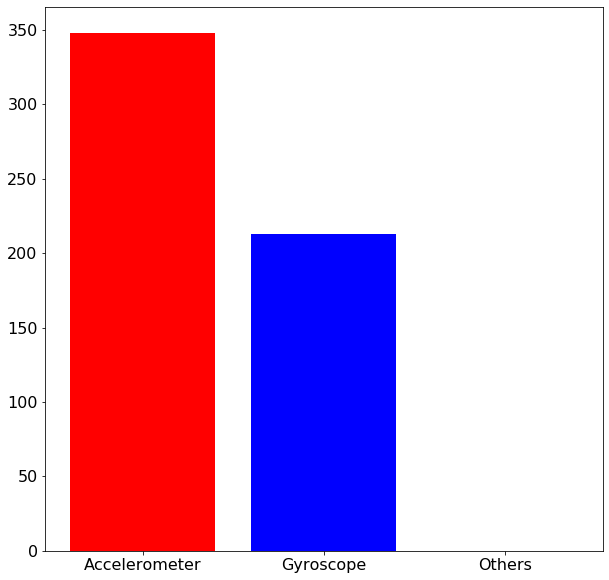

In [68]:
# Count for each type
acc = 0
gyro = 0
others = 0
for column in df.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))
plt.show()


#### Static and dynamic activities :

SITTING, STANDING, LAYING can be considered as static activities with no motion involved

WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved

Use tBodyAccMag-mean() feature to differentiate among these two broader set of activities.

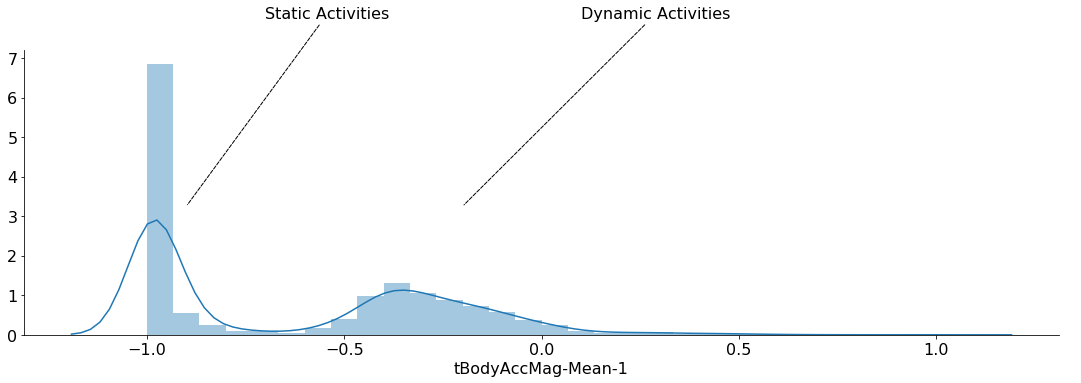

In [95]:
facetgrid = sns.FacetGrid(df,  height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-Mean-1').add_legend()
plt.annotate("Static Activities", xy=(-.9,3.25), xytext=(-0.7, 8),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 8),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.show()

In [103]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = df['tBodyAcc-Mean-1'],palette="bright")

TypeError: 'type' object is not subscriptable

#### Display as time series object

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

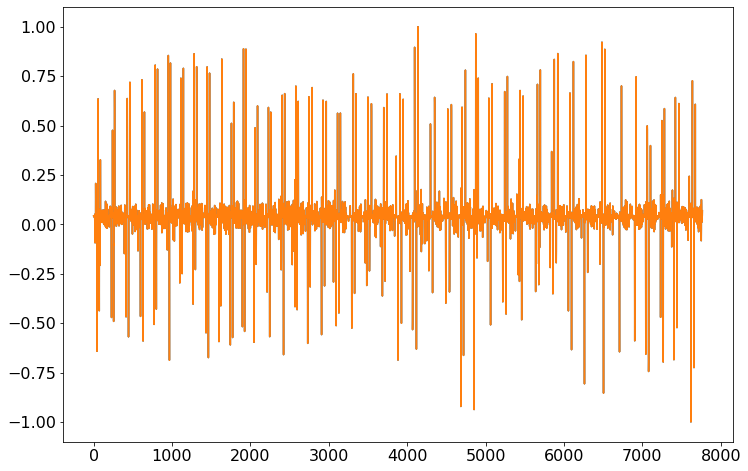

In [108]:
sensor=df.iloc[:,0]
time=np.arange(0,len(sensor),1)
plt.plot(time, sensor)
plt.show()

#### Display as frequency object

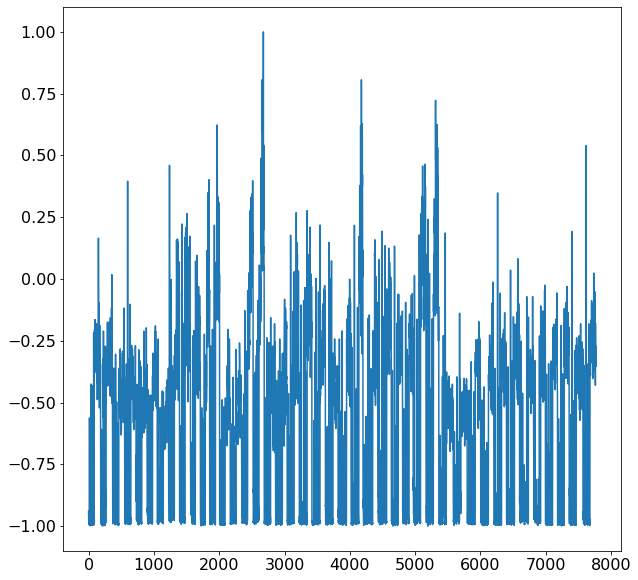

In [117]:
sensor=df.iloc[:,267]
time=np.arange(0,len(sensor),1)
plt.plot(time, sensor)
plt.show()

#### PCA

In [124]:
from sklearn.decomposition import PCA
pca =PCA(0.95) #95% variance
df_pca=pca.fit_transform(df) #for training data
df_pca.shape

(7767, 71)

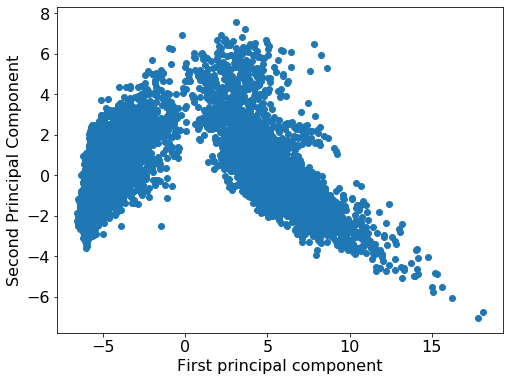

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0],df_pca[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

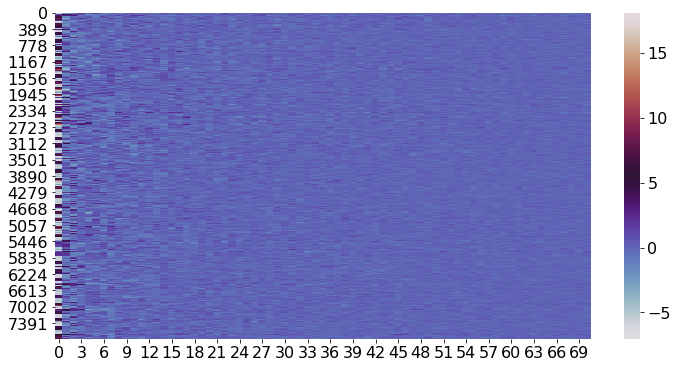

In [137]:
map= pd.DataFrame(df_pca)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')
plt.show()